In [2]:
import tensorflow as tf
print(tf.__version__)

2.14.0


In [5]:
#load mnist data
mnist= tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) =mnist.load_data()

#scale from 0 to 1
x_train, x_test = x_train/255, x_test/255
print("x_train.shape:", x_train.shape)

11490434/11490434 [==============================] - 4s 0us/step
x_train.shape: (60000, 28, 28)


In [8]:
#build the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [10]:
#compile the model 
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

In [11]:
#train the model 
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10


2023-09-30 14:06:01.789852: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 [==============================] - 8s 4ms/step - loss: 0.2957 - accuracy: 0.9146 - val_loss: 0.1412 - val_accuracy: 0.9589
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1420 - accuracy: 0.9579 - val_loss: 0.1042 - val_accuracy: 0.9690
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1080 - accuracy: 0.9675 - val_loss: 0.0879 - val_accuracy: 0.9726
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0890 - accuracy: 0.9718 - val_loss: 0.0780 - val_accuracy: 0.9775
Epoch 5/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0742 - accuracy: 0.9757 - val_loss: 0.0746 - val_accuracy: 0.9762
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0646 - accuracy: 0.9790 - val_loss: 0.0751 - val_accuracy: 0.9768
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0586 - accuracy: 0.9812 - val_loss: 0.0721 - val_accuracy: 0.9785
Epo

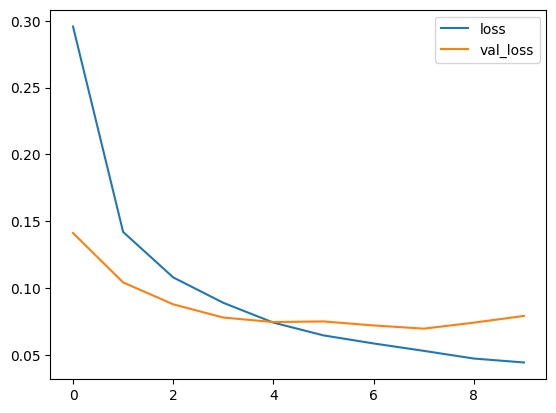

In [12]:
#plot loss per iteration 
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

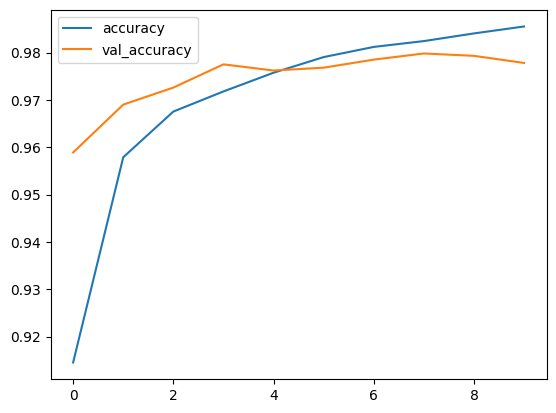

In [13]:
#plot accuracy per iteration 
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

In [14]:
#evaluate the model 
print(model.evaluate(x_test, y_test))

313/313 [==============================] - 1s 2ms/step - loss: 0.0792 - accuracy: 0.9778
[0.07917103916406631, 0.9778000116348267]


In [26]:
p_test = model.predict(x_test).argmax(axis=1)
type(p_test)

313/313 [==============================] - 1s 2ms/step


numpy.ndarray

Text(0.5, 1.0, 'True label: 2 Predicted 2')

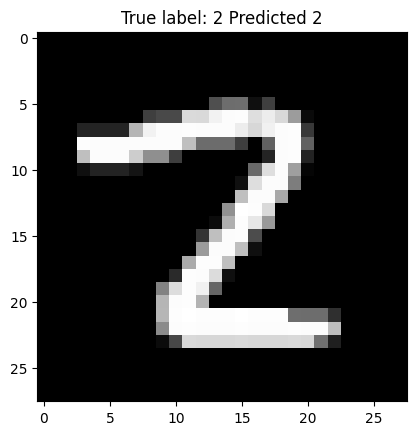

In [70]:
#show misclassified examples
import numpy as np
misclassified_idx=np.where(p_test != y_test[0])[0]
#pick one entry randomly
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted %s" %(y_test[i], p_test[i]))  
#

In [59]:
#np.where(p_test != y_test)[0]

In [50]:
np.random.choice(misclassified_idx)

827